# Import packages

In [10]:
import pandas as pd
import numpy as np
import sklearn as sk
import statsmodels.api as sm

import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller



# Custom functions

# Import data

In [4]:
# Import preprocess dataset
df = pd.read_csv('../Data/preprocessed_df.csv',index_col=0)

print(df.head())

      Date  snp500_Open  snp500_High   snp500_Low  snp500_Close  \
0  2011-01  1257.619995  1302.670044  1257.619995   1286.119995   
1  2011-02  1289.140015  1344.069946  1289.140015   1327.219971   
2  2011-03  1328.640015  1332.280029  1249.050049   1325.829956   
3  2011-04  1329.479980  1364.560059  1294.699951   1363.609985   
4  2011-05  1365.209961  1370.579956  1311.800049   1345.199951   

   snp500_Adj Close  snp500_Volume   CAPE   TB10  CPI_growth_rate  TB3MS  \
0       1286.119995    92164940000  22.98  3.374         0.476323   0.15   
1       1327.219971    59223660000  23.49  3.422         0.493137   0.13   
2       1325.829956    89507640000  22.90  3.470         0.975107   0.10   
3       1363.609985    77364810000  23.14  3.290         0.643943   0.06   
4       1345.199951    81708980000  23.06  3.059         0.470419   0.04   

    DFR   DFY     OIL_WTI  EUR_USD  CNY_USD      FTSE100  
0  2.68  1.05   89.510000   1.3686   0.1513  5862.899902  
1  2.66  0.93   89.366

# Derive additional features

## S&P 500 realized price volatility

In [7]:
# Parameters
vol_window_size = 12

# Construct feature
df['SPV'] = df['snp500_Adj Close'].rolling(window=vol_window_size).std()

print(df.head())

      Date  snp500_Open  snp500_High   snp500_Low  snp500_Close  \
0  2011-01  1257.619995  1302.670044  1257.619995   1286.119995   
1  2011-02  1289.140015  1344.069946  1289.140015   1327.219971   
2  2011-03  1328.640015  1332.280029  1249.050049   1325.829956   
3  2011-04  1329.479980  1364.560059  1294.699951   1363.609985   
4  2011-05  1365.209961  1370.579956  1311.800049   1345.199951   

   snp500_Adj Close  snp500_Volume   CAPE   TB10  CPI_growth_rate  TB3MS  \
0       1286.119995    92164940000  22.98  3.374         0.476323   0.15   
1       1327.219971    59223660000  23.49  3.422         0.493137   0.13   
2       1325.829956    89507640000  22.90  3.470         0.975107   0.10   
3       1363.609985    77364810000  23.14  3.290         0.643943   0.06   
4       1345.199951    81708980000  23.06  3.059         0.470419   0.04   

    DFR   DFY     OIL_WTI  EUR_USD  CNY_USD      FTSE100  SPV  
0  2.68  1.05   89.510000   1.3686   0.1513  5862.899902  NaN  
1  2.66  0.9

In [9]:
# Drop rows with NaN value
df = df.dropna()

print(df.head())

       Date  snp500_Open  snp500_High   snp500_Low  snp500_Close  \
11  2011-12  1246.910034  1269.369995  1202.369995   1257.599976   
12  2012-01  1258.859985  1333.469971  1258.859985   1312.410034   
13  2012-02  1312.449951  1378.040039  1312.449951   1365.680054   
14  2012-03  1365.900024  1419.150024  1340.030029   1408.469971   
15  2012-04  1408.469971  1422.380005  1357.380005   1397.910034   

    snp500_Adj Close  snp500_Volume   CAPE   TB10  CPI_growth_rate  TB3MS  \
11       1257.599976    74742430000  20.52  1.876        -0.246652   0.01   
12       1312.410034    79567560000  21.21  1.795         0.440019   0.03   
13       1365.680054    78385710000  21.80  1.974         0.440297   0.09   
14       1408.469971    83899660000  22.05  2.214         0.759456   0.08   
15       1397.910034    74761710000  21.78  1.919         0.302103   0.08   

     DFR   DFY     OIL_WTI  EUR_USD  CNY_USD      FTSE100        SPV  
11  3.30  1.32   98.612273   1.2948   0.1589  5572.299805

# Transform variables for stationarity

In [12]:

adf_test = adfuller(df['snp500_Adj Close'])

print ("ADF = " + str(adf_test[0]))
print ("p-value = " +str(adf_test[1]))

# Not stationary!!

ADF = -0.10605268883540019
p-value = 0.9488323151711808


In [14]:
# Let's check after transformation
log_return = [np.log(df['snp500_Adj Close'].iloc[i]/df['snp500_Adj Close'].iloc[i-1])\
              for i in range(1,len(df['snp500_Adj Close']))]

adf_test = adfuller(log_return)

print ("ADF = " + str(adf_test[0]))
print ("p-value = " +str(adf_test[1]))

# That is already stationary!

ADF = -7.376640172254899
p-value = 8.687528002588852e-11


# Create training sample and test sample

In [16]:
n = len(df)
testsize = 0.2

train_last_index = int((1-testsize)*n)

Y_test = log_return[train_last_index:]

# Models

## Historical moving average

In [24]:
window_size = 12

y_preds = [np.nanmean(np.asarray(log_return[i-window_size:i])) for i in range(window_size,len(log_return))]

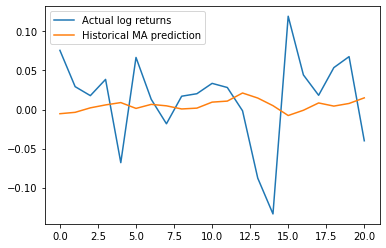

In [28]:
plt.plot(Y_test,label="Actual log returns")
plt.plot(y_preds[-len(Y_test):],label="Historical MA prediction")
plt.legend(loc='upper left')
plt.show()